In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
np.random.seed(0)

# Regression

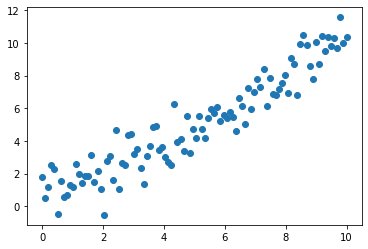

In [2]:
m = 100 # creating 100 samples 
X = np.linspace(0,10,m).reshape(m, 1)
y1 = X + np.random.randn(m, 1)

plt.scatter(X,y1)

In [3]:
from sklearn.linear_model import LinearRegression

score =  0.8881140743377214


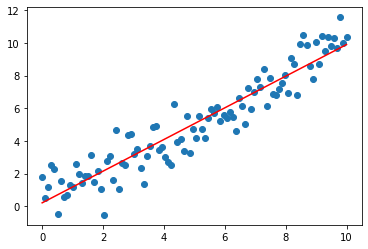

In [4]:
model = LinearRegression()
model.fit(X,y1)
print("score = ", model.score(X, y1))
predictions = model.predict(X)
plt.scatter(X,y1)
plt.plot(X, predictions, c='r')

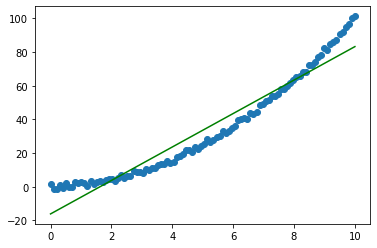

In [5]:
# if y2 is not linear 
y2 = X**2 + np.random.randn(m, 1)
plt.scatter(X, y2)

model2 = LinearRegression()
model2.fit(X,y2)
predictions2 = model2.predict(X)

plt.plot(X, predictions2, c='g')

In [6]:
# to correct that , choose the right model(algorithm) 

from sklearn.svm import SVR

C:\Users\mwambans\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


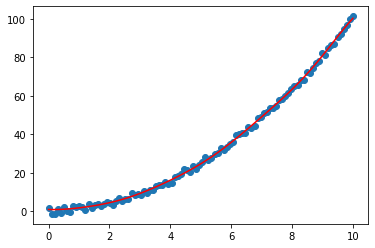

In [7]:
model3 = SVR(C=100)
model3.fit(X,y2)
predictions3 = model3.predict(X)

plt.scatter(X,y2)
plt.plot(X,predictions3, c='r')

# Classification

In [8]:
import seaborn as sns
import pandas as pd 

In [9]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [11]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [13]:
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0,1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016CF50C1648>,
      dtype=object)

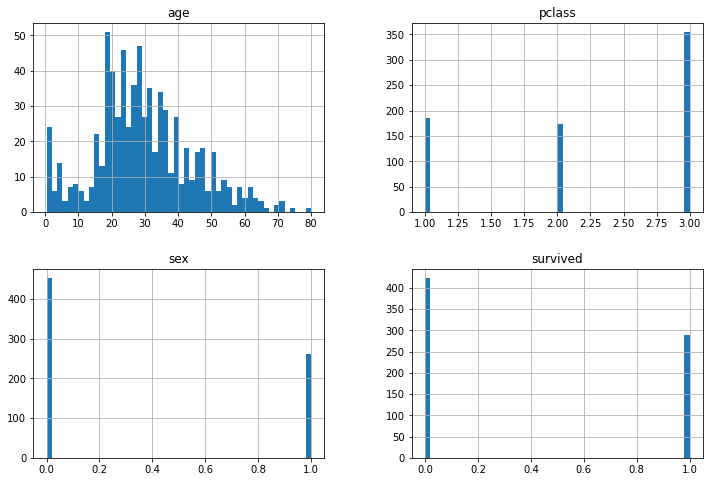

In [14]:
titanic.hist(bins=50,figsize=(12,8))

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
features = titanic.drop('survived', axis=1)
target = titanic['survived']
model = KNeighborsClassifier()
model.fit(features, target)
print(model.predict(features), '\n')
print('Precision =', model.score(features, target))

[0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1
 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1
 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0
 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1
 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1
 1 0 0 1 0 0 1 0 1 0 0 0 

In [17]:
def predict_survived(model, pclass=3, sex=0, age=26): 
    features = np.array([pclass, sex, age]).reshape(1,3)
    print(model.predict(features))
    print(model.predict_proba(features))


In [18]:
from sklearn.linear_model import LogisticRegression


In [19]:
model = LogisticRegression()
features = titanic.drop('survived', axis=1)
target = titanic['survived']
model.fit(features, target)
print(model.predict(features), '\n')
print('Precision =', model.score(features, target))

[0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0
 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0
 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0
 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1
 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0
 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0
 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 

In [20]:
print(predict_survived(model))

[0]
[[0.90177981 0.09822019]]
None


# Exercice
### search the right hyper parameter that has the best scrore 

2


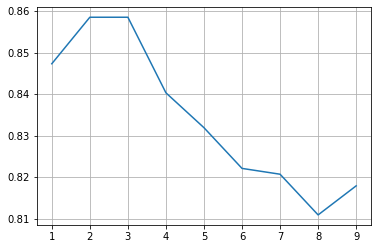

In [21]:
hyper_paramter = list(range(1, 10))
n_score = []
best_score = 0
neighbors = 1

for n in hyper_paramter: 
    
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(features, target)
    n_score.append(model.score(features, target))
    if best_score < model.score(features, target):
        neighbors = n 
        best_score = model.score(features, target)

print(neighbors)
plt.plot(hyper_paramter, n_score)
plt.grid()